In [5]:
import logging
import warnings

import pandas as pd

from technical_index.binance import get_futures_market_data
from technical_index.index import (build_indicator_parameters,
                                   build_quantitative_analysis)
from technical_index.plot import PlotConfig, plot_candlestick_with_indicators

# 过滤pandas警告
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
# 设置日志级别为ERROR，只显示错误信息
logging.basicConfig(level=logging.ERROR)

In [2]:
# 获取ETHUSDT的1小时K线数据，限制500条
df = get_futures_market_data("ETHUSDT", "1h", limit=500)
df.tail(5)

,Open,High,Low,Close,Volume,Number_Of_Trades,Taker_Buy_Base_Asset_Volume,Taker_Buy_Quote_Asset_Volume
Open_Time,,,,,,,,
2025-07-16 04:00:00,3115.07,3130.90,3099.60,3127.82,195247.326,206395,104751.174,3.264358e+08
2025-07-16 05:00:00,3127.82,3151.92,3127.44,3141.89,279161.693,274873,147846.481,4.642416e+08
2025-07-16 06:00:00,3141.88,3166.50,3131.26,3164.00,298180.634,278572,153018.316,4.821799e+08
2025-07-16 07:00:00,3163.99,3174.00,3153.41,3160.55,257602.740,257279,118491.440,3.749230e+08
2025-07-16 08:00:00,3160.55,3172.96,3157.05,3163.19,140789.063,151428,67726.635,2.142721e+08


In [3]:
# 构建技术指标参数
indicator_params = build_indicator_parameters(ma_periods=(5, 10, 20, 50))

# 计算技术指标
print("正在计算技术指标...")
df_with_indicators = build_quantitative_analysis(df, **indicator_params)
df_with_indicators.tail(5)

正在计算技术指标...


,Open,High,Low,Close,Volume,Number_Of_Trades,Taker_Buy_Base_Asset_Volume,Taker_Buy_Quote_Asset_Volume,MACD_12_26_9,MACDh_12_26_9,...,CDL_TASUKIGAP,CDL_THRUSTING,CDL_TRISTAR,CDL_UNIQUE3RIVER,CDL_UPSIDEGAP2CROWS,CDL_XSIDEGAP3METHODS,HA_open,HA_high,HA_low,HA_close
Open_Time,,,,,,,,,,,,,,,,,,,,,
2025-07-16 04:00:00,3115.07,3130.90,3099.60,3127.82,195247.326,206395,104751.174,3.264358e+08,33.998367,6.524057,...,0.0,0.0,0.0,0.0,0.0,0.0,3120.152976,3130.90,3099.600000,3118.3475
2025-07-16 05:00:00,3127.82,3151.92,3127.44,3141.89,279161.693,274873,147846.481,4.642416e+08,34.983389,6.007264,...,0.0,0.0,0.0,0.0,0.0,0.0,3119.250238,3151.92,3119.250238,3137.2675
2025-07-16 06:00:00,3141.88,3166.50,3131.26,3164.00,298180.634,278572,153018.316,4.821799e+08,37.120220,6.515275,...,0.0,0.0,0.0,0.0,0.0,0.0,3128.258869,3166.50,3128.258869,3150.9100
2025-07-16 07:00:00,3163.99,3174.00,3153.41,3160.55,257602.740,257279,118491.440,3.749230e+08,38.096139,5.992955,...,0.0,0.0,0.0,0.0,0.0,0.0,3139.584434,3174.00,3139.584434,3162.9875
2025-07-16 08:00:00,3160.55,3172.96,3157.05,3163.19,140789.063,151428,67726.635,2.142721e+08,38.637202,5.227215,...,0.0,0.0,0.0,0.0,0.0,0.0,3151.285967,3172.96,3151.285967,3163.4375


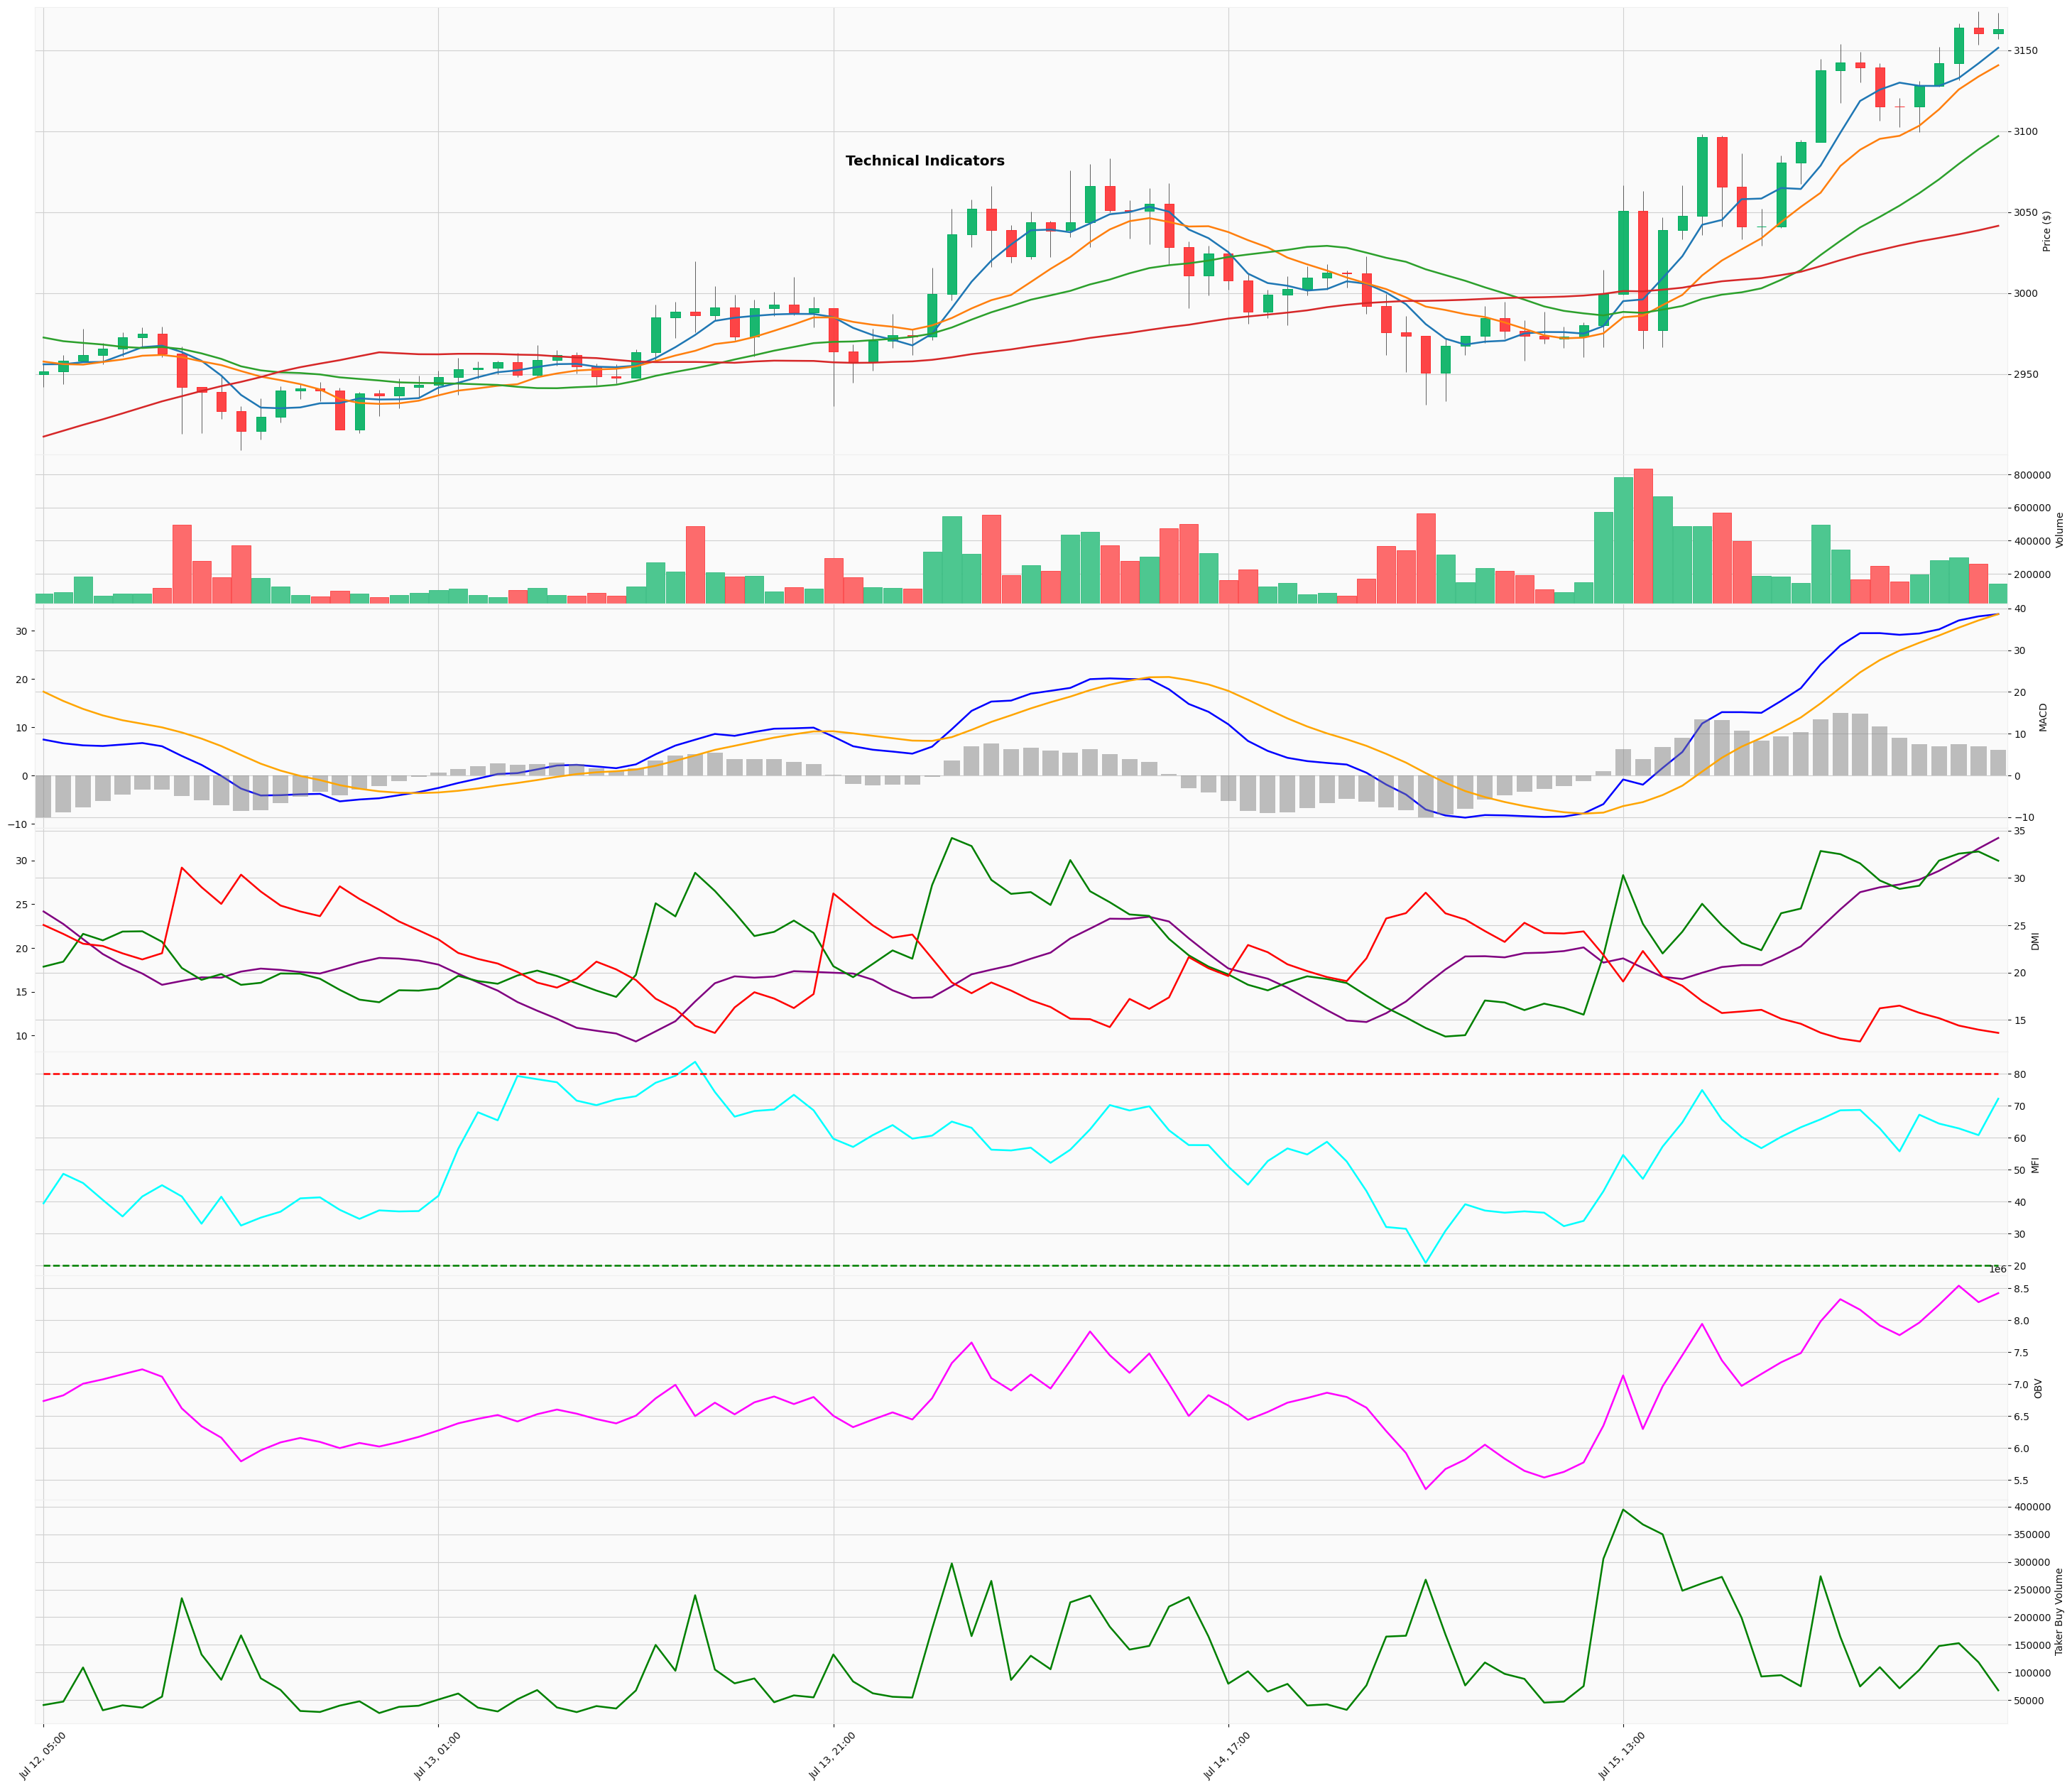

In [4]:
config = PlotConfig(
    indicators=["macd", "dmi", "mfi", "obv", "taker_buy"],
    sma_periods=(5, 10, 20, 50), # 绘制SMA线
    limit=100,
)
plot_candlestick_with_indicators(df_with_indicators, config=config)